In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

%matplotlib inline

In [2]:
cdc = pd.read_csv('../data/cdc_clean.csv')

In [3]:
cdc_trans = cdc.loc[cdc.trans.isin(['Transgender'])]
cdc_cis = cdc.loc[cdc.trans.isin(['Cisgender'])]
cdc_trans.head()

,_STATE,_AGE_G,_SEX,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,PVTRESD3,MARITAL,_EDUCAG,...,poor_gen_health_trans,poor_gen_health_cis,poor_phys_health,poor_phys_health_trans,poor_phys_health_cis,poor_ment_health,poor_ment_health_trans,poor_ment_health_cis,persdoc,checkup
7347,Alaska,Age 45 to 54,Female,NaN,NaN,Straight,"Yes, female to male",NaN,Married,Graduated from College or Technical School,...,No,NaN,No,No,NaN,No,No,NaN,One or more,Within past year
7635,Alaska,Age 35 to 44,Male,NaN,Straight,NaN,"Yes, male to female",NaN,Never Married,Graduated High School,...,No,NaN,No,No,NaN,Yes,Yes,NaN,One or more,Within past year
7709,Alaska,Age 65 and older,Male,NaN,Gay,NaN,"Yes, male to female",NaN,Separated,Did not graduate High School,...,No,NaN,No,No,NaN,No,No,NaN,One or more,Within past year
7993,Alaska,Age 35 to 44,Male,NaN,Straight,NaN,"Yes, male to female",NaN,Married,Graduated High School,...,No,NaN,No,No,NaN,No,No,NaN,One or more,Within past year
8102,Alaska,Age 65 and older,Male,NaN,Something Else,NaN,"Yes, gender nonconforming",NaN,Divorced,Graduated from College or Technical School,...,No,NaN,No,No,NaN,No,No,NaN,One or more,Within past year


## 1. What regions have the greatest health disparities between transgender and cisgender people?

### National Health

In [4]:
trans_poor_health = 0
total_trans = 0
cis_poor_health = 0
total_cis = 0

In [5]:
for ind,row in cdc.iterrows():
    if row.trans == 'Transgender' and row.GENHLTH == 'Poor':
        total_trans += 1
        trans_poor_health += 1
    elif row.trans == 'Transgender':
        total_trans += 1
    elif row.trans == 'Cisgender' and row.GENHLTH == 'Poor':
        total_cis += 1
        cis_poor_health += 1
    elif row.trans == 'Cisgender':
        total_cis += 1
print(str.format('Percent of Trans People with Poor General Health: {}%', round((trans_poor_health/total_trans)*100,2)))
print(str.format('Percent of Cis People with Poor General Health: {}%', round((cis_poor_health/total_cis)*100,2)))

Percent of Trans People with Poor General Health: 9.01%
Percent of Cis People with Poor General Health: 5.23%


In [6]:
trans_14 = 0
total_trans = 0
cis_14 = 0
total_cis = 0

In [7]:
for ind,row in cdc.iterrows():
    if row.trans == 'Transgender' and row._PHYS14D != '14+ days when physical health not good':
        total_trans += 1
    elif row.trans == 'Transgender' and row._PHYS14D == '14+ days when physical health not good':
        total_trans += 1
        trans_14 += 1
    elif row.trans == 'Cisgender' and row._PHYS14D != '14+ days when physical health not good':
        total_cis += 1
    elif row.trans == 'Cisgender' and row._PHYS14D == '14+ days when physical health not good':
        total_cis += 1
        cis_14 += 1

print(str.format('Percent of Trans People with 14+ days in the last month when physical health not good: {}%', round((trans_14/total_trans)*100,2)))
print(str.format('Percent of Cis People with 14+ days in the last month when physical health not good: {}%',round((cis_14/total_cis)*100,2)))

Percent of Trans People with 14+ days in the last month when physical health not good: 19.48%
Percent of Cis People with 14+ days in the last month when physical health not good: 13.76%


In [8]:
trans_14 = 0
total_trans = 0
cis_14 = 0
total_cis = 0

In [9]:
for ind,row in cdc.iterrows():
    if row.trans == 'Transgender' and row._MENT14D != '14+ days when mental health not good':
        total_trans += 1
    elif row.trans == 'Transgender' and row._MENT14D == '14+ days when mental health not good':
        total_trans += 1
        trans_14 += 1
    elif row.trans == 'Cisgender' and row._MENT14D != '14+ days when mental health not good':
        total_cis += 1
    elif row.trans == 'Cisgender' and row._MENT14D == '14+ days when mental health not good':
        total_cis += 1
        cis_14 += 1

print(str.format('Percent of Trans People with 14+ days in the last month when mental health not good: {}%', round((trans_14/total_trans)*100,2)))
print(str.format('Percent of Cis People with 14+ days in the last month when mental health not good: {}%',round((cis_14/total_cis)*100,2)))

Percent of Trans People with 14+ days in the last month when mental health not good: 29.11%
Percent of Cis People with 14+ days in the last month when mental health not good: 11.73%


### Health State Breakdown

In [10]:
# states = list(cdc_trans._STATE.unique())

In [11]:
# dict_states = []
# pct_trans_poor_fair = []
# pct_cis_poor_fair = []

In [12]:
# for item in states:
#     trans_poor_fair_health = 0
#     total_trans = 0
#     cis_poor_fair_health = 0
#     total_cis = 0
#     dict_state = item
#     state_df = cdc.loc[cdc._STATE == item]
    
#     for ind,row in state_df.iterrows():
#         if row.trans == 'Yes' and (row._RFHLTH == 'Good or Better Health' or row._RFHLTH == np.nan):
#             total_trans += 1
#         elif row.trans == 'Yes' and row._RFHLTH == 'Fair or Poor Health':
#             total_trans += 1
#             trans_poor_fair_health += 1
#         elif row.trans == 'No' and (row._RFHLTH == 'Good or Better Health' or row._RFHLTH == np.nan):
#             total_cis += 1
#         elif row.trans == 'No' and row._RFHLTH == 'Fair or Poor Health':
#             total_cis += 1
#             cis_poor_fair_health += 1

#     dict_states.append(dict_state)
#     pct_trans_poor_fair.append(round((trans_poor_fair_health/total_trans)*100,2))
#     pct_cis_poor_fair.append(round((cis_poor_fair_health/total_cis)*100,2))

In [13]:
# state_breakdown = pd.DataFrame({'state':states, 'pct_trans_poor_fair':pct_trans_poor_fair,
#                                 'pct_cis_poor_fair':pct_cis_poor_fair})
# state_breakdown.head()

In [14]:
# state_breakdown.sort_values('pct_trans_poor_fair', ascending=False)

In [15]:
# state_breakdown['diff'] = state_breakdown.pct_trans_poor_fair - state_breakdown.pct_cis_poor_fair

In [16]:
# state_breakdown.sort_values('diff',ascending=False)

In [17]:
# cdc_trans._STATE.value_counts()

### Health Region Breakdown

#### General Health

In [18]:
regions = list(cdc_trans.region.unique())

In [19]:
pct_trans_poor_reg = []
pct_cis_poor_reg = []

In [20]:
for item in regions:
    trans_poor_health = 0
    total_trans = 0
    cis_poor_health = 0
    total_cis = 0
    region_df = cdc.loc[cdc.region == item]
    
    for ind,row in region_df.iterrows():
        if row.trans == 'Transgender' and (row.GENHLTH == 'Poor'):
            total_trans += 1
            trans_poor_health += 1
        elif row.trans == 'Transgender':
            total_trans += 1
        elif row.trans == 'Cisgender' and (row.GENHLTH == 'Poor'):
            total_cis += 1
            cis_poor_health += 1
        elif row.trans == 'Cisgender':
            total_cis += 1

    pct_trans_poor_reg.append(round((trans_poor_health/total_trans)*100,2))
    pct_cis_poor_reg.append(round((cis_poor_health/total_cis)*100,2))

region_breakdown = pd.DataFrame({'region':regions, 'pct_trans_poor':pct_trans_poor_reg,
                                'pct_cis_poor':pct_cis_poor_reg})

In [21]:
cdc_trans.region.value_counts()

South          345
West           255
Midwest        180
Northeast      149
Territories     26
Name: region, dtype: int64

In [22]:
region_breakdown['diff'] = region_breakdown.pct_trans_poor - region_breakdown.pct_cis_poor

In [23]:
region_breakdown = region_breakdown.sort_values('diff', ascending = False)

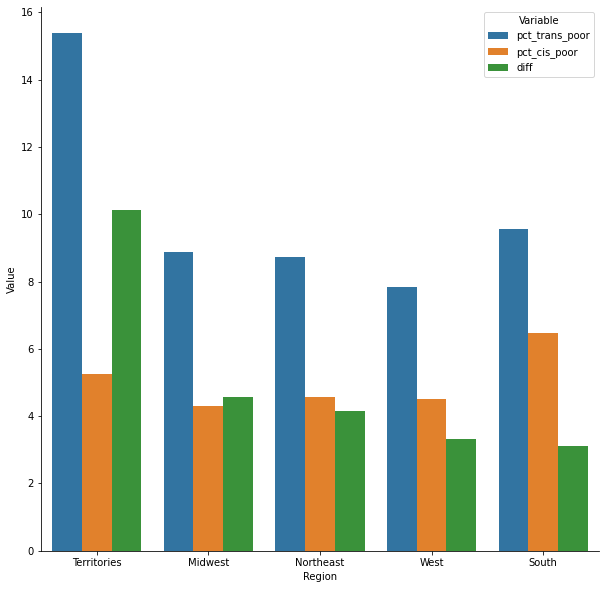

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = region_breakdown.melt(id_vars='region').rename(columns=str.title)
sns.barplot(x='Region', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

#### Physical Health

In [25]:
phys_trans = []
phys_cis = []

In [26]:
for item in regions:
    trans_14 = 0
    total_trans = 0
    cis_14 = 0
    total_cis = 0
    region_df = cdc.loc[cdc.region == item]
    
    for ind,row in region_df.iterrows():
        if row.trans == 'Transgender' and row._PHYS14D != '14+ days when physical health not good':
            total_trans += 1
        elif row.trans == 'Transgender' and row._PHYS14D == '14+ days when physical health not good':
            total_trans += 1
            trans_14 += 1
        elif row.trans == 'Cisgender' and row._PHYS14D != '14+ days when physical health not good':
            total_cis += 1
        elif row.trans == 'Cisgender' and row._PHYS14D == '14+ days when physical health not good':
            total_cis += 1
            cis_14 += 1

    phys_trans.append(round((trans_14/total_trans)*100,2))
    phys_cis.append(round((cis_14/total_cis)*100,2))

phys_region = pd.DataFrame({'region':regions, 'pct_14_trans':phys_trans,
                                'pct_14_cis':phys_cis})

In [27]:
phys_region['diff'] = phys_region.pct_14_trans - phys_region.pct_14_cis

In [28]:
phys_region = phys_region.sort_values('diff',ascending=False)

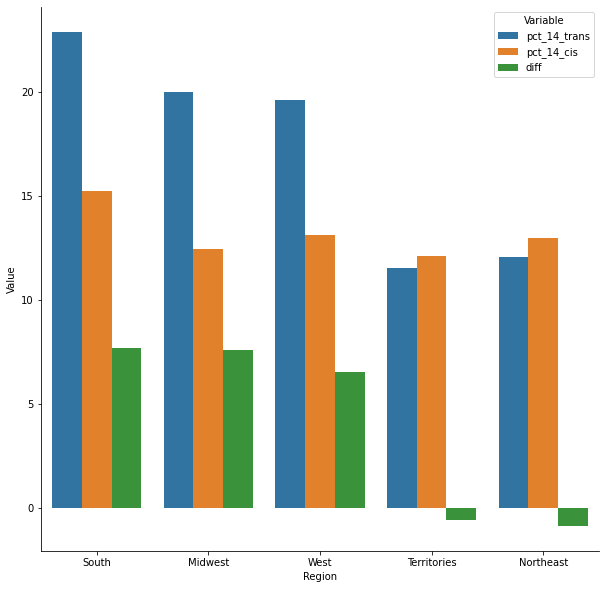

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = phys_region.melt(id_vars='region').rename(columns=str.title)
sns.barplot(x='Region', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

#### Mental Health

In [30]:
ment_trans = []
ment_cis = []

In [31]:
for item in regions:
    trans_14 = 0
    total_trans = 0
    cis_14 = 0
    total_cis = 0
    region_df = cdc.loc[cdc.region == item]
    
    for ind,row in region_df.iterrows():
        if row.trans == 'Transgender' and row._MENT14D != '14+ days when mental health not good':
            total_trans += 1
        elif row.trans == 'Transgender' and row._MENT14D == '14+ days when mental health not good':
            total_trans += 1
            trans_14 += 1
        elif row.trans == 'Cisgender' and row._MENT14D != '14+ days when mental health not good':
            total_cis += 1
        elif row.trans == 'Cisgender' and row._MENT14D == '14+ days when mental health not good':
            total_cis += 1
            cis_14 += 1

    ment_trans.append(round((trans_14/total_trans)*100,2))
    ment_cis.append(round((cis_14/total_cis)*100,2))

ment_region = pd.DataFrame({'region':regions, 'pct_14_trans':ment_trans,
                                'pct_14_cis':ment_cis})

In [32]:
ment_region['diff'] = ment_region.pct_14_trans - ment_region.pct_14_cis

In [33]:
ment_region.sort_values('diff',ascending=False)

,region,pct_14_trans,pct_14_cis,diff
0,West,32.94,11.31,21.63
1,Northeast,30.20,10.86,19.34
2,South,28.99,12.69,16.30
3,Midwest,26.11,11.07,15.04
4,Territories,7.69,12.17,-4.48


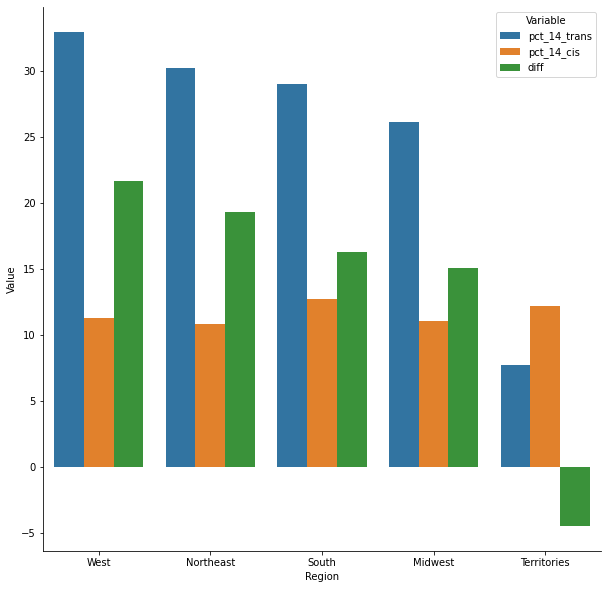

In [34]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = ment_region.melt(id_vars='region').rename(columns=str.title)
sns.barplot(x='Region', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

#### Merging

In [35]:
reg_phys = pd.merge(region_breakdown,phys_region, on='region',how='outer')

In [36]:
reg_phys

,region,pct_trans_poor,pct_cis_poor,diff_x,pct_14_trans,pct_14_cis,diff_y
0,Territories,15.38,5.26,10.12,11.54,12.12,-0.58
1,Midwest,8.89,4.31,4.58,20.00,12.43,7.57
2,Northeast,8.72,4.56,4.16,12.08,12.97,-0.89
3,West,7.84,4.51,3.33,19.61,13.10,6.51
4,South,9.57,6.46,3.11,22.90,15.24,7.66


In [37]:
health_diff = pd.merge(reg_phys, ment_region, on='region',how='outer')

In [38]:
health_diff.head()

,region,pct_trans_poor,pct_cis_poor,diff_x,pct_14_trans_x,pct_14_cis_x,diff_y,pct_14_trans_y,pct_14_cis_y,diff
0,Territories,15.38,5.26,10.12,11.54,12.12,-0.58,7.69,12.17,-4.48
1,Midwest,8.89,4.31,4.58,20.00,12.43,7.57,26.11,11.07,15.04
2,Northeast,8.72,4.56,4.16,12.08,12.97,-0.89,30.20,10.86,19.34
3,West,7.84,4.51,3.33,19.61,13.10,6.51,32.94,11.31,21.63
4,South,9.57,6.46,3.11,22.90,15.24,7.66,28.99,12.69,16.30


In [39]:
health_diff.columns = ['region','poor_fair_gen_health_trans','poor_fair_gen_health_cis','poor_fair_gen_health_diff',
                      'poor_phys_health_trans','poor_phys_health_cis','poor_phys_health_diff','poor_ment_health_trans',
                      'poor_ment_health_cis','poor_ment_health_diff']

In [40]:
health_diff

,region,poor_fair_gen_health_trans,poor_fair_gen_health_cis,poor_fair_gen_health_diff,poor_phys_health_trans,poor_phys_health_cis,poor_phys_health_diff,poor_ment_health_trans,poor_ment_health_cis,poor_ment_health_diff
0,Territories,15.38,5.26,10.12,11.54,12.12,-0.58,7.69,12.17,-4.48
1,Midwest,8.89,4.31,4.58,20.00,12.43,7.57,26.11,11.07,15.04
2,Northeast,8.72,4.56,4.16,12.08,12.97,-0.89,30.20,10.86,19.34
3,West,7.84,4.51,3.33,19.61,13.10,6.51,32.94,11.31,21.63
4,South,9.57,6.46,3.11,22.90,15.24,7.66,28.99,12.69,16.30


In [41]:
health_diff.to_csv('../data/health_diff.csv',index=False)

In [42]:
health_diff_viz = health_diff[['poor_fair_gen_health_trans','poor_fair_gen_health_cis', 'poor_phys_health_trans','poor_phys_health_cis','poor_ment_health_trans','poor_ment_health_cis']]

## What factors might contribute to those health disparities?

### What age ranges do cis and trans people fall in?

In [43]:
trans_age_grouped = cdc_trans.groupby(['region', '_AGE_G']).size()

In [44]:
trans_age_pct = trans_age_grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
trans_age_pct = trans_age_pct.reset_index()
trans_age_pct.columns = ['region','age_range','trans_pct']
trans_age_pct.head()

,region,age_range,trans_pct
0,Midwest,Age 18 to 24,21.666667
1,Midwest,Age 25 to 34,15.555556
2,Midwest,Age 35 to 44,10.555556
3,Midwest,Age 45 to 54,8.333333
4,Midwest,Age 55 to 64,18.888889


In [45]:
cis_age_grouped = cdc_cis.groupby(['region', '_AGE_G']).size()
cis_age_pct = cis_age_grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
cis_age_pct = cis_age_pct.reset_index()
cis_age_pct.columns = ['region','age_range','cis_pct']
cis_age_pct.head()

,region,age_range,cis_pct
0,Midwest,Age 18 to 24,6.077208
1,Midwest,Age 25 to 34,9.804336
2,Midwest,Age 35 to 44,11.940772
3,Midwest,Age 45 to 54,14.278160
4,Midwest,Age 55 to 64,21.023797


In [46]:
ages_merged = pd.merge(trans_age_pct,cis_age_pct, on=['region','age_range'],how='outer')
ages_merged

,region,age_range,trans_pct,cis_pct
0,Midwest,Age 18 to 24,21.666667,6.077208
1,Midwest,Age 25 to 34,15.555556,9.804336
2,Midwest,Age 35 to 44,10.555556,11.940772
3,Midwest,Age 45 to 54,8.333333,14.278160
4,Midwest,Age 55 to 64,18.888889,21.023797
5,Midwest,Age 65 and older,25.000000,36.875727
6,Northeast,Age 18 to 24,14.093960,4.464107
7,Northeast,Age 25 to 34,20.134228,8.528614
8,Northeast,Age 35 to 44,14.765101,10.041387
9,Northeast,Age 45 to 54,14.093960,15.407450


### What percentage of cis and trans people have health coverage?

In [47]:
trans_health_coverage = cdc_trans.groupby(['region', '_HCVU651']).size()
trans_health_coverage_df = trans_health_coverage.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
trans_health_coverage_df = trans_health_coverage_df.reset_index()
trans_health_coverage_df.columns = ['region','health_coverage_status','pct']
trans_health_coverage_df = trans_health_coverage_df.loc[trans_health_coverage_df.health_coverage_status.isin(['Do not have health care coverage'])]
trans_no_coverage = trans_health_coverage_df[['region','pct']]
trans_no_coverage

,region,pct
0,Midwest,12.686567
2,Northeast,14.678899
4,South,21.705426
6,Territories,15.789474
8,West,12.631579


In [48]:
cis_health_coverage = cdc_cis.groupby(['region', '_HCVU651']).size()
cis_health_coverage_df = cis_health_coverage.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
cis_health_coverage_df = cis_health_coverage_df.reset_index()
cis_health_coverage_df.columns = ['region','health_coverage_status','pct']
cis_health_coverage_df = cis_health_coverage_df.loc[cis_health_coverage_df.health_coverage_status.isin(['Do not have health care coverage'])]
cis_no_coverage = cis_health_coverage_df[['region','pct']]
cis_no_coverage

,region,pct
0,Midwest,9.421426
2,Northeast,8.575166
4,South,16.203442
6,Territories,18.165138
8,West,12.166051


In [49]:
no_health_coverage = pd.merge(trans_no_coverage,cis_no_coverage,on='region')
no_health_coverage.columns = ['region','pct_trans','pct_cis']
no_health_coverage['diff']=no_health_coverage.pct_trans - no_health_coverage.pct_cis
no_health_coverage

,region,pct_trans,pct_cis,diff
0,Midwest,12.686567,9.421426,3.265142
1,Northeast,14.678899,8.575166,6.103733
2,South,21.705426,16.203442,5.501984
3,Territories,15.789474,18.165138,-2.375664
4,West,12.631579,12.166051,0.465528


In [50]:
no_health_coverage = no_health_coverage.sort_values('diff', ascending=False)

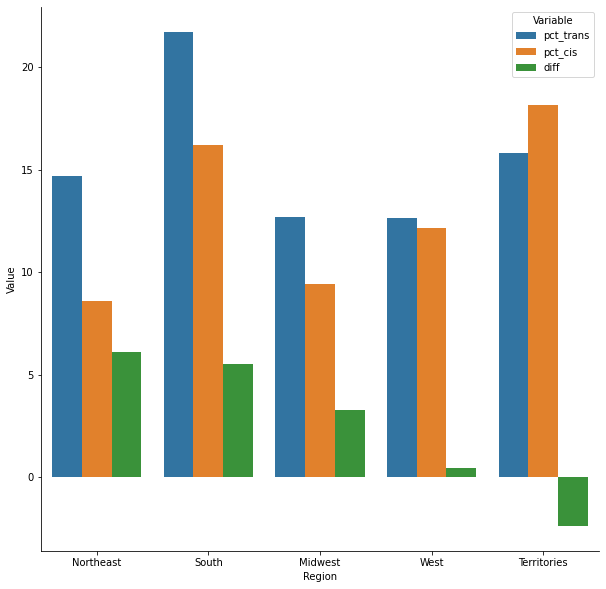

In [51]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = no_health_coverage.melt(id_vars='region').rename(columns=str.title)
sns.barplot(x='Region', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

### Routine Checkups

In [52]:
checkup_trans = []
checkup_cis = []

In [53]:
for item in regions:
    trans = 0
    total_trans = 0
    cis = 0
    total_cis = 0
    region_df = cdc.loc[cdc.region == item]
    
    for ind,row in region_df.iterrows():
        if row.trans == 'Transgender' and row.checkup == 'Within past year':
            total_trans += 1
        elif row.trans == 'Transgender' and row.checkup == 'Not within past year':
            total_trans += 1
            trans += 1
        elif row.trans == 'Cisgender' and row.checkup == 'Within past year':
            total_cis += 1
        elif row.trans == 'Cisgender' and row.checkup == 'Not within past year':
            total_cis += 1
            cis += 1

    checkup_trans.append(round((trans/total_trans)*100,2))
    checkup_cis.append(round((cis/total_cis)*100,2))

checkup_region = pd.DataFrame({'region':regions, 'no_checkup_trans':checkup_trans,
                                'no_checkup_cis':checkup_cis})

In [54]:
checkup_region

,region,no_checkup_trans,no_checkup_cis
0,West,15.42,12.71
1,Northeast,10.81,6.91
2,South,11.76,8.97
3,Midwest,13.89,9.94
4,Territories,15.38,11.20


In [55]:
checkup_region.to_csv('../data/checkup.csv',index=False)

In [56]:
cdc_trans.region.value_counts()

South          345
West           255
Midwest        180
Northeast      149
Territories     26
Name: region, dtype: int64

In [57]:
cdc_ne = cdc_trans.loc[cdc.region.isin(['Northeast'])]
cdc_ne_poor = cdc_ne.loc[cdc_ne.poor_gen_health == 'Yes']

In [58]:
cdc_ne_poor.shape

(13, 39)